<a href="https://colab.research.google.com/github/nithinreddy00/democodes/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn import preprocessing

In [ ]:
data = pd.read_csv('DataT3RR.csv')
print('Size of weather data frame is :',data.shape)
data.info()
data[0:10]

Size of weather data frame is : (923, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Stasiun      923 non-null    object 
 1   Tanggal      923 non-null    object 
 2   Tn           923 non-null    float64
 3   Tx           923 non-null    float64
 4   Tavg         923 non-null    float64
 5   RR           923 non-null    float64
 6   Hari_hujan   923 non-null    int64  
 7   Besok_hujan  923 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 57.8+ KB


,Stasiun,Tanggal,Tn,Tx,Tavg,RR,Hari_hujan,Besok_hujan
0,Stasiun Meteorologi Nangapinoh,20-03-2010,20.3,31.1,25.8,108.0,1,1
1,Stasiun Meteorologi Maritim Tanjung Mas,07-03-2010,25.0,31.8,29.2,106.0,1,1
2,Stasiun Klimatologi Mempawah,09-01-2009,23.4,29.6,25.8,100.6,1,1
3,Stasiun Meteorologi Cilacap,09-01-2009,23.6,28.0,25.6,93.9,1,1
4,Stasiun Klimatologi Bogor,21-01-2009,21.1,29.4,25.5,93.0,1,1
5,Stasiun Meteorologi Maritim Tanjung Mas,14-01-2009,24.0,27.0,24.9,92.8,1,1
6,Stasiun Meteorologi Maritim Tanjung Mas,12-01-2010,25.0,30.6,27.4,89.0,1,1
7,Stasiun Meteorologi Maritim Tanjung Mas,25-03-2010,25.0,32.0,28.3,82.2,1,1
8,Stasiun Meteorologi Maritim Tanjung Mas,13-03-2010,26.4,33.4,29.3,82.0,1,1
9,Stasiun Klimatologi Bogor,10-02-2010,21.8,33.2,25.8,81.2,1,1


In [ ]:
data.count() .sort_values()

Stasiun        923
Tanggal        923
Tn             923
Tx             923
Tavg           923
RR             923
Hari_hujan     923
Besok_hujan    923
dtype: int64

In [ ]:
data = data.drop(columns=['Stasiun','Tanggal'], axis=1)
data = data.dropna(how='any')
print(data.shape)

(923, 6)


In [ ]:
print(data.shape)
data.head()

(923, 6)


,Tn,Tx,Tavg,RR,Hari_hujan,Besok_hujan
0,20.3,31.1,25.8,108.0,1,1
1,25.0,31.8,29.2,106.0,1,1
2,23.4,29.6,25.8,100.6,1,1
3,23.6,28.0,25.6,93.9,1,1
4,21.1,29.4,25.5,93.0,1,1


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


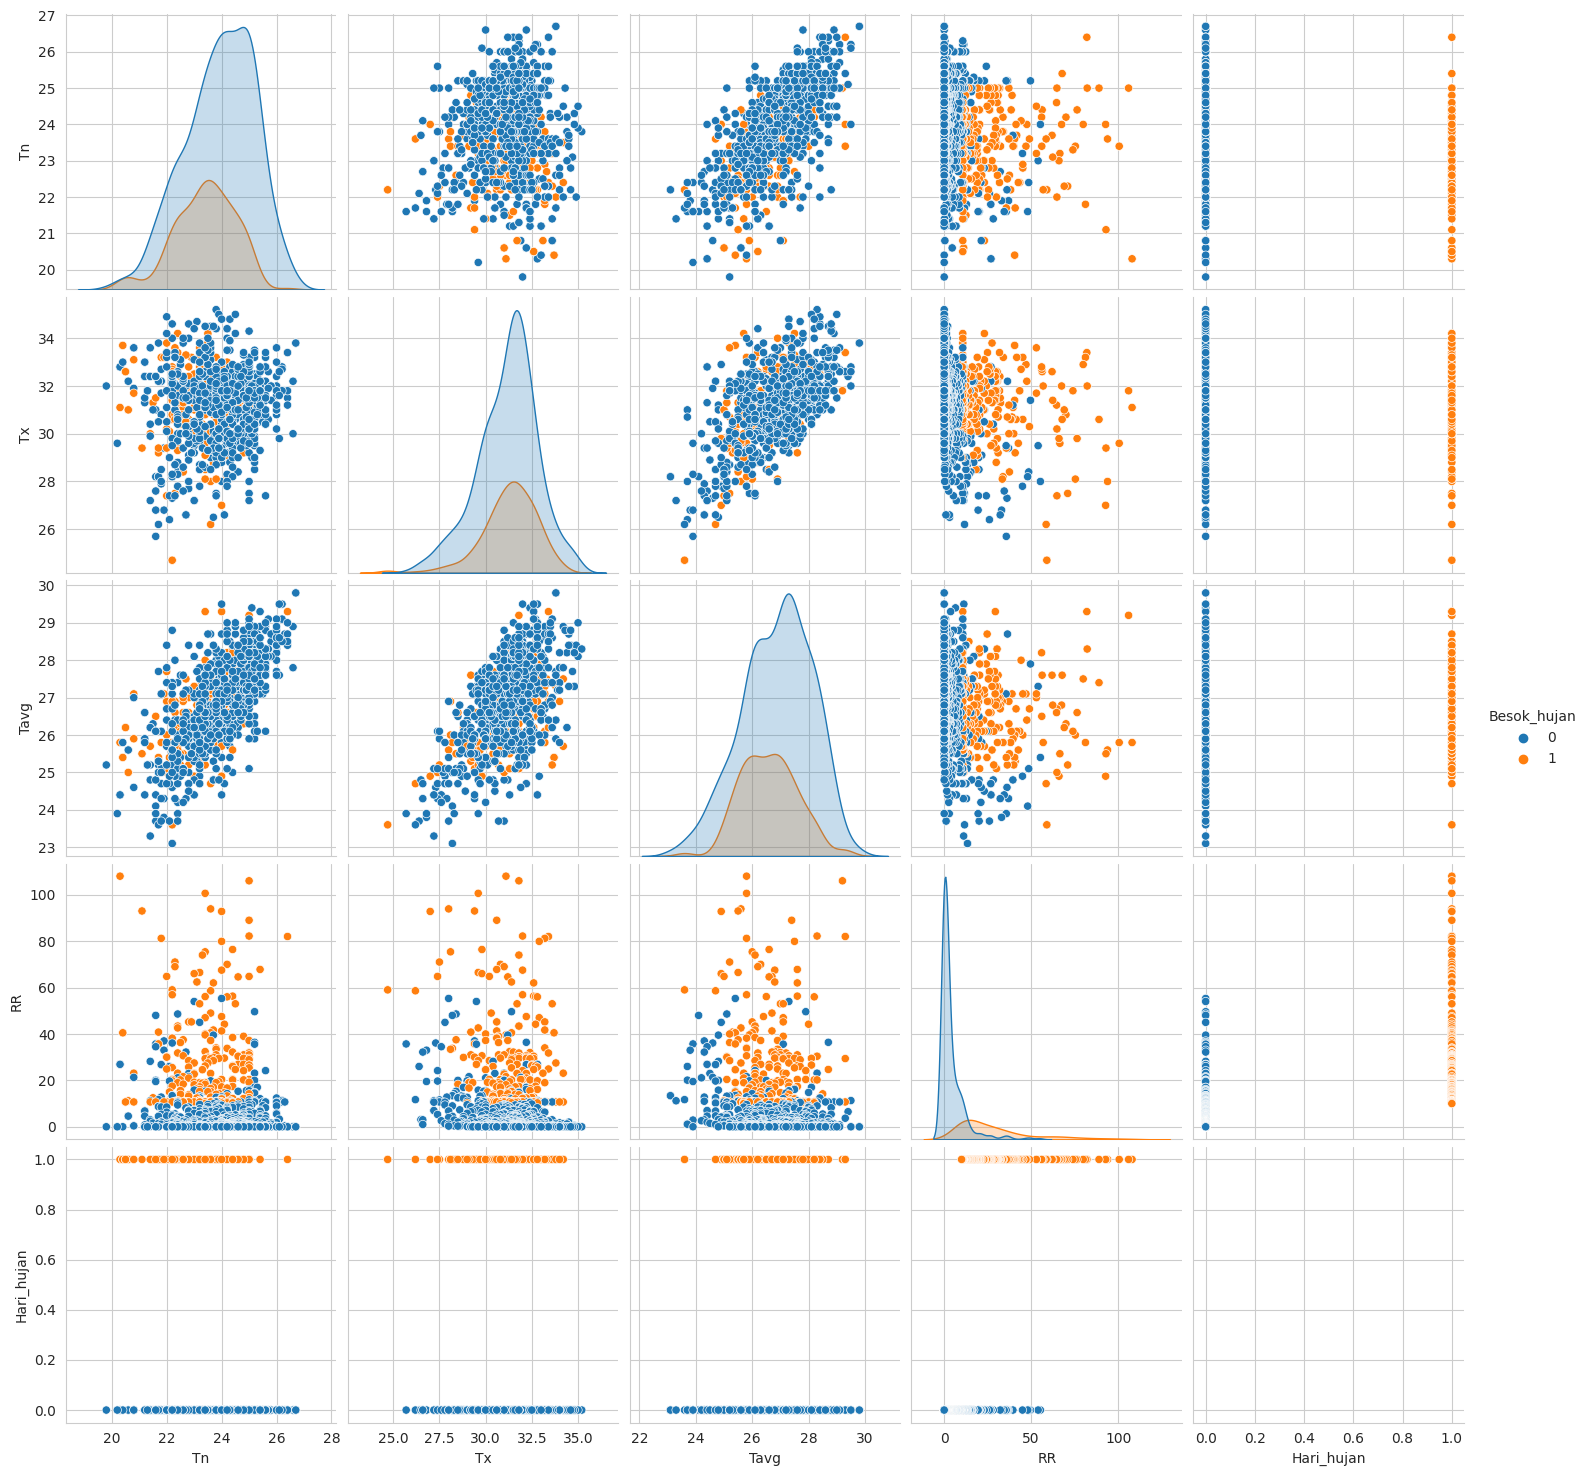

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(data,hue="Besok_hujan",size=3);
plt.show()

In [ ]:
corr = data.corr()
corr1 = pd.DataFrame(abs(corr['Besok_hujan']),columns = ['Besok_hujan','Tn','Tx','Tavg'])
nonvals = corr1.loc[corr1['Besok_hujan'] < 0.005]
print('Var correlation < 0.5%',nonvals)
nonvals = list(nonvals.index.values)
data1 = data.drop(columns=nonvals,axis=1)
print('Data Final',data1.shape)

Var correlation < 0.5% Empty DataFrame
Columns: [Besok_hujan, Tn, Tx, Tavg]
Index: []
Data Final (923, 6)


<Axes: >

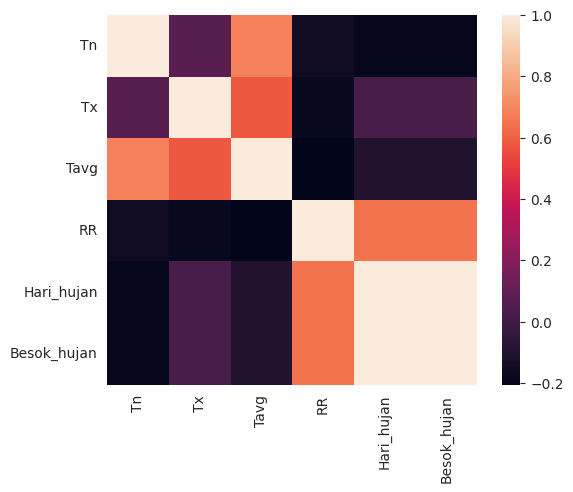

In [ ]:
data = data[['Tn','Tx','Tavg','RR','Hari_hujan','Besok_hujan']] #Subsetting the data
cor = data.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Y=data1['Besok_hujan']
X=data1.drop(columns=['Besok_hujan'])
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=9)

In [ ]:
print('X train shape:', X_train.shape)
print('Y train shape:', Y_train.shape)
print('X test shape:', X_test.shape)
print('X train shape:', X_train.shape)

X train shape: (646, 5)
Y train shape: (646,)
X test shape: (277, 5)
X train shape: (646, 5)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knncla = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
knncla.fit(X_train, Y_train)
Y_predict6 = knncla.predict(X_test)

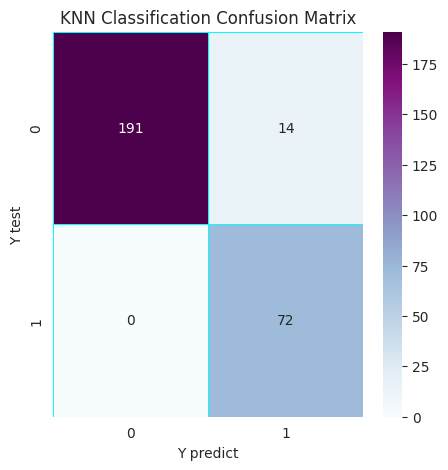

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
knncla_cm = confusion_matrix(Y_test, Y_predict6)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knncla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="BuPu")
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [ ]:
test_acc_knncla = round(knncla.fit(X_train,Y_train).score(X_test, Y_test)* 100, 2)
train_acc_knncla = round(knncla.fit(X_train, Y_train).score(X_train, Y_train)* 100, 2)

In [ ]:
model1 = pd.DataFrame({'Model': ['KNN'],'Train Score': [train_acc_knncla],'Test Score': [test_acc_knncla]})
model1.sort_values(by='Test Score', ascending=False)

,Model,Train Score,Test Score
0,KNN,97.68,94.95


In [ ]:
Y1 = data['Besok_hujan']
X1 = data.drop(columns=['Besok_hujan','Hari_hujan'])
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.05, penalty="l1", dual=False,random_state=9).fit(X1, Y1)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X1)
cc = list(X1.columns[model.get_support(indices=True)])
print(cc)
print(len(cc))

['Tn', 'Tx', 'RR']
3


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


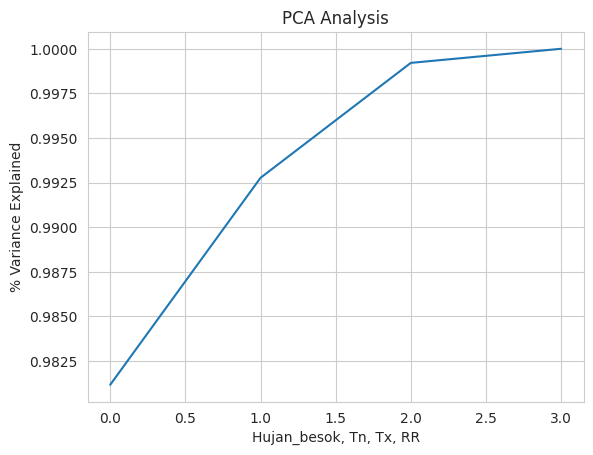

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(X1)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Hujan_besok, Tn, Tx, RR')
plt.ylabel('% Variance Explained')
plt.title('PCA Analysis')
plt.grid(True)
plt.show()

In [ ]:
X1 = data[cc]
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=9)

In [ ]:
knncla.fit(X1_train, Y1_train)
Y1_predict6 = knncla.predict(X1_test)
knncla_cm = confusion_matrix(Y1_test, Y1_predict6)
score1_knncla= knncla.score(X1_test, Y1_test)

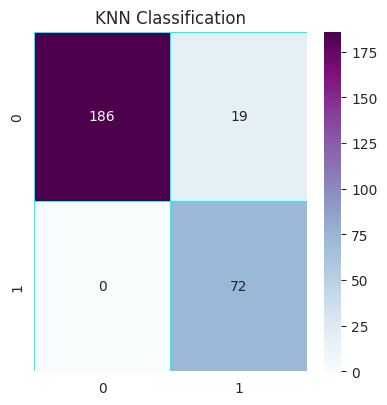

In [ ]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3, 3, 1)
ax1.set_title('KNN Classification')
sns.heatmap(data=knncla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="BuPu" ,fmt='g', ax=ax1)
plt.show()

In [ ]:
Testscores1 = pd.Series([score1_knncla], index=[ 'K-Nearest Neighbour Score'])
print(Testscores1)

K-Nearest Neighbour Score    0.931408
dtype: float64
